# 1. Exploration et Prétraitement des Données

**Objectif :** Ce notebook a pour but de charger les données brutes, d'appliquer les étapes de prétraitement nécessaires et de vérifier que les données sont prêtes à être utilisées par notre modèle de Deep Learning.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration des chemins ---
# Le notebook se trouve dans 'notebooks/', donc nous remontons d'un niveau
# pour accéder à la racine du projet.
PROJECT_ROOT = ".."
DATA_PATH = os.path.join(PROJECT_ROOT, "data")
SRC_PATH = os.path.join(PROJECT_ROOT, "src")

# Ajouter le dossier src au chemin pour importer nos modules
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

# --- Import de nos fonctions de prétraitement ---
from load_data import load_demographics, get_file_labels
from preprocess_signals import read_signals, normalize_signals, pad_signals

## 2. Chargement des Métadonnées
Nous chargeons d'abord le fichier `demographics.xls` pour faire le lien entre les ID des patients et leur groupe (Contrôle `CO` ou Patient `PT`).

In [2]:
demographics = load_demographics(DATA_PATH)
all_files, file_labels = get_file_labels(DATA_PATH, demographics)

print("Aperçu des données démographiques :")
print(demographics.head())
print(f"\nNombre total de fichiers de signaux trouvés : {len(all_files)}")

Aperçu des données démographiques :
       ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0  GaPt03    Ga    PT        3  female   82             1.45         50.0   
1  GaPt04    Ga    PT        4    male   68             1.71          NaN   
2  GaPt05    Ga    PT        5  female   82             1.53         51.0   
3  GaPt06    Ga    PT        6    male   72             1.70         82.0   
4  GaPt07    Ga    PT        7  female   53             1.67         54.0   

   HoehnYahr  UPDRS  UPDRSM   TUAG  Speed_01 (m/sec)  Speed_10  
0        3.0   20.0    10.0  36.34               NaN     0.778  
1        2.5   25.0     8.0  11.00             0.642     0.818  
2        2.5   24.0     5.0  14.50             0.908     0.614  
3        2.0   16.0    13.0  10.47             0.848     0.937  
4        3.0   44.0    22.0  18.34             0.677     0.579  

Nombre total de fichiers de signaux trouvés : 306


## 3. Lecture et Prétraitement des Signaux
Chaque fichier `.txt` est lu. Le pipeline de prétraitement suivant est appliqué :
1.  **Lecture** : Les 16 signaux des capteurs sont extraits.
2.  **Normalisation** : Les signaux sont mis à l'échelle entre 0 et 1 (Min-Max scaling).
3.  **Padding** : Un padding est ajouté pour que tous les signaux aient la même longueur.

In [5]:
X, y = read_signals(all_files, file_labels)
X_norm = normalize_signals(X)
X_array = pad_signals(X_norm)
y_array = np.array(y)

print(f"Forme des données après prétraitement complet : {X_array.shape}")
print(f"Forme des labels : {y_array.shape}")
print("Exemple de X_array[0] :\n", X_array[0][:5, :])

Forme des données après prétraitement complet : (306, 26366, 16)
Forme des labels : (306,)
Exemple de X_array[0] :
 [[0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.3659601  0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.3659601  0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.35473815 0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17708789 0.3659601  0.34395198 0.31263858 0.45482866 0.12341147
  0.1566416  0.27589183 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.35473815 0.34395198 0.31263858 0.45482866 0.13047162
  0.1566416  0.2

## 4. Visualisation d'un Échantillon
Pour vérifier que nos données ont été correctement traitées, nous visualisons les signaux des 16 capteurs pour le premier enregistrement de notre jeu de données.

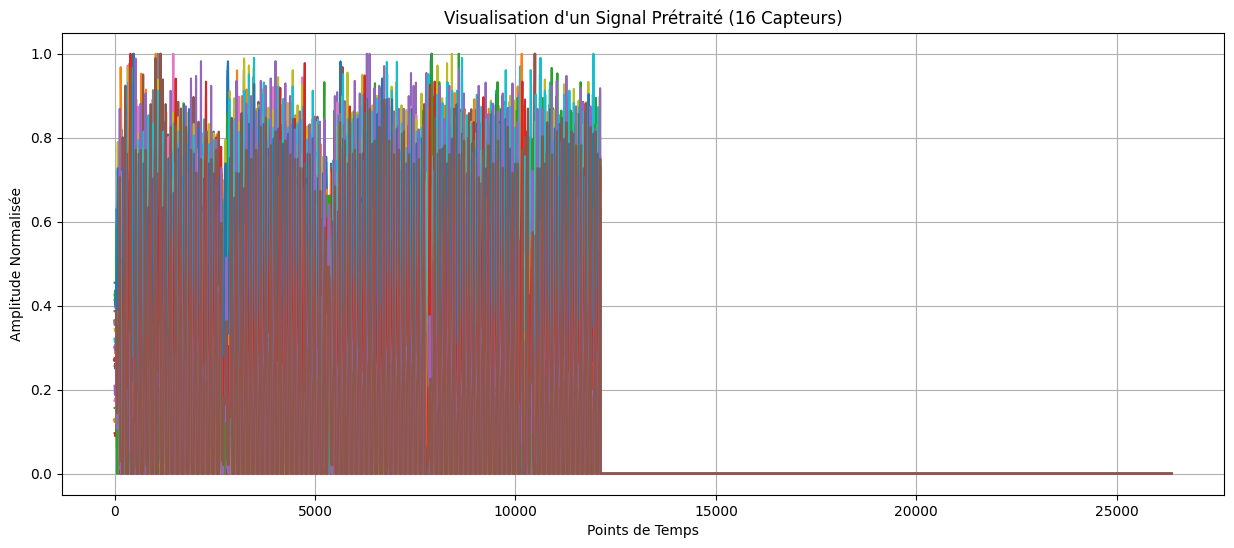

In [4]:
plt.figure(figsize=(15, 6))
plt.title("Visualisation d'un Signal Prétraité (16 Capteurs)")
# Affiche les 16 signaux du premier échantillon
plt.plot(X_array[0])
plt.xlabel("Points de Temps")
plt.ylabel("Amplitude Normalisée")
plt.grid(True)
plt.show()